# Restaurant Inspection - ADT Project
### Rohan Bankala
### Neil Bhutada

In [ ]:
#Rohan Bankala

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connects to SQLite database
conn = sqlite3.connect("restaurant_inspections.db")
cursor = conn.cursor()


In [ ]:
#Rohan Bankala

# Loading the CSV files
est_df = pd.read_csv("establishment.csv")
emp_df = pd.read_csv("employee.csv")
insp_df = pd.read_csv("inspection.csv")
viol_df = pd.read_csv("violation.csv")
#point_df = pd.read_csv("inspection_point.csv")


In [ ]:
#Neil Bhutada

with open("restaurant_inspection_schema.sql", "r") as f:
    schema_sql = f.read()
cursor.executescript(schema_sql)
print("Tables created successfully.")


Tables created successfully.


In [ ]:
#Rohan Bankala

# Data Cleaning
insp_df['inspection_date'] = pd.to_datetime(insp_df['inspection_date'], errors='coerce').dt.date
insp_df.dropna(subset=['inspection_id'], inplace=True)

# Inserting data into tables
est_df.to_sql("establishment", conn, if_exists='append', index=False)
emp_df.to_sql("employee", conn, if_exists='append', index=False)
insp_df.to_sql("inspection", conn, if_exists='append', index=False)
#point_df.to_sql("inspection_point", conn, if_exists='append', index=False)
viol_df.to_sql("violation", conn, if_exists='append', index=False)
print("Data inserted into all tables.")


/var/folders/zf/340jxlt11lz6z4z1gn7gttxm0000gn/T/ipykernel_91601/2065233394.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  insp_df['inspection_date'] = pd.to_datetime(insp_df['inspection_date'], errors='coerce').dt.date


Data inserted into all tables.


In [ ]:
#Neil Bhutada

# Checking table schema and constraints
cursor.execute("PRAGMA table_info('inspection');")
print("Inspection table schema:")
for row in cursor.fetchall():
    print(row)

cursor.execute("PRAGMA foreign_key_list('violation');")
print("\nForeign keys in violation table:")
for row in cursor.fetchall():
    print(row)


Inspection table schema:
(0, 'inspection_id', 'INTEGER', 0, None, 1)
(1, 'inspection_date', 'DATE', 0, None, 0)
(2, 'inspection_type', 'TEXT', 0, None, 0)
(3, 'results', 'TEXT', 0, None, 0)
(4, 'employee_id', 'INTEGER', 0, None, 0)
(5, 'license_no', 'INTEGER', 0, None, 0)
(6, 'followup_to', 'INTEGER', 0, None, 0)

Foreign keys in violation table:
(0, 0, 'inspection', 'inspection_id', 'inspection_id', 'NO ACTION', 'NO ACTION', 'NONE')


### Visulaizations - Rohan Bankala

/var/folders/zf/340jxlt11lz6z4z1gn7gttxm0000gn/T/ipykernel_91601/1500939027.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('inspection_date').resample('M').sum().plot(title="Monthly Inspection Volume")


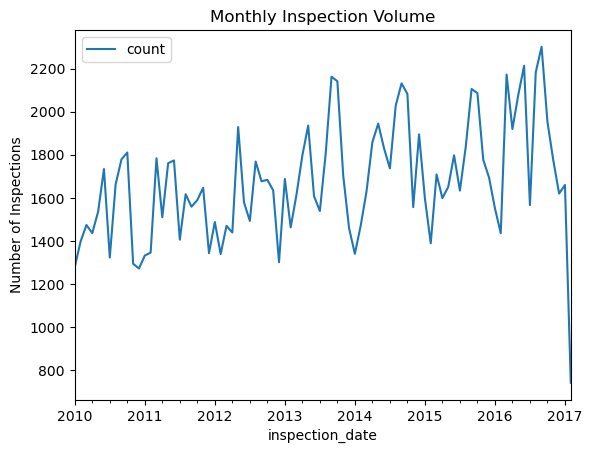

In [ ]:
# Inspections Over Time
query = "SELECT inspection_date, COUNT(*) as count FROM inspection GROUP BY inspection_date"
df = pd.read_sql_query(query, conn)
df['inspection_date'] = pd.to_datetime(df['inspection_date'])
df.set_index('inspection_date').resample('M').sum().plot(title="Monthly Inspection Volume")
plt.ylabel("Number of Inspections")
plt.show()


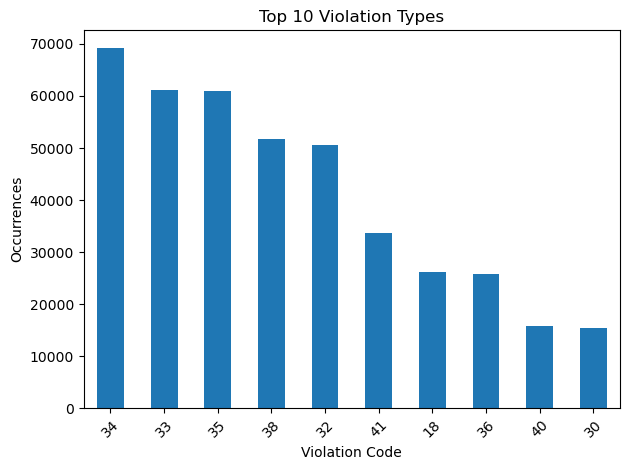

In [ ]:
#Top 10 violation types
query = """
SELECT point_id, COUNT(*) as count
FROM violation
GROUP BY point_id
ORDER BY count DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
df.plot.bar(x='point_id', y='count', title='Top 10 Violation Types', legend=False)
plt.xlabel("Violation Code")
plt.ylabel("Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


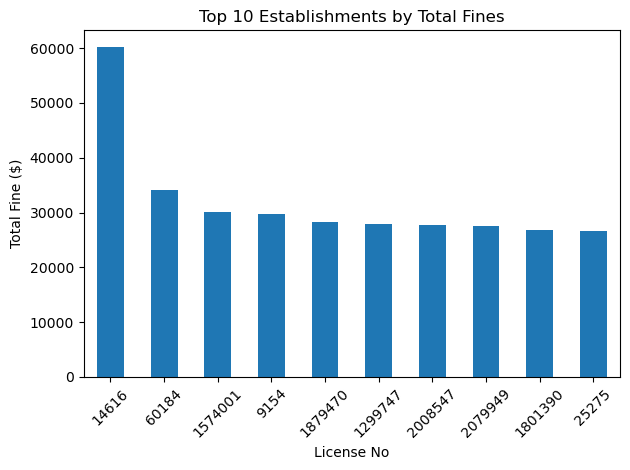

In [ ]:
#Top 10 Establishments by total fines
query = """
SELECT license_no, SUM(fine) as total_fine
FROM violation
JOIN inspection USING (inspection_id)
GROUP BY license_no
ORDER BY total_fine DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
df.plot.bar(x='license_no', y='total_fine', title='Top 10 Establishments by Total Fines', legend=False)
plt.xlabel("License No")
plt.ylabel("Total Fine ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


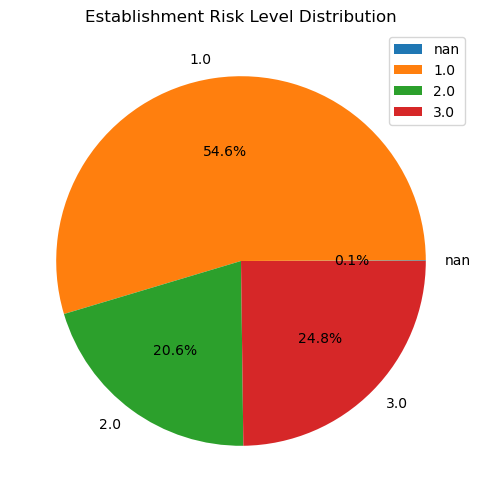

In [ ]:
#Establishment risk level distributions
query = """
SELECT risk_level, COUNT(*) as count
FROM establishment
GROUP BY risk_level
"""
df = pd.read_sql_query(query, conn)
df.set_index('risk_level').plot.pie(y='count', autopct='%1.1f%%', title="Establishment Risk Level Distribution", figsize=(6, 6))
plt.ylabel('')
plt.show()


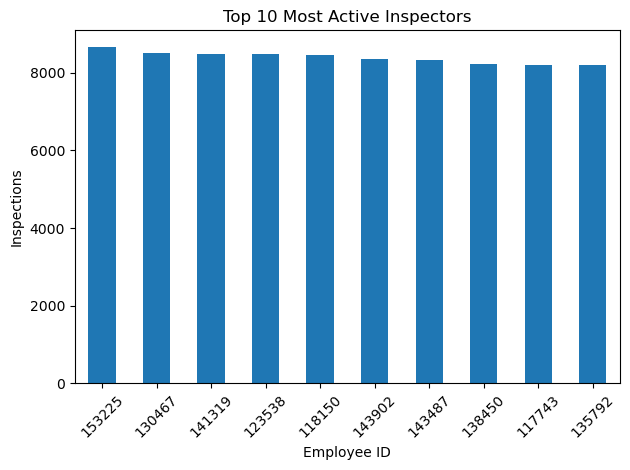

In [ ]:
#Top 10 most active health inspectors
query = """
SELECT employee_id, COUNT(*) as inspections
FROM inspection
GROUP BY employee_id
ORDER BY inspections DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
df.plot.bar(x='employee_id', y='inspections', title='Top 10 Most Active Inspectors', legend=False)
plt.xlabel("Employee ID")
plt.ylabel("Inspections")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
import nbconvert
import nbformat

notebook_filename = "restaurant_inspection_project.ipynb"

with open(notebook_filename) as f:
    nb = nbformat.read(f, as_version=4)

html_exporter = nbconvert.HTMLExporter()
body, resources = html_exporter.from_notebook_node(nb)

with open("ADT_part2_code.html", "w", encoding="utf-8") as f:
    f.write(body)
